<a href="https://colab.research.google.com/github/Adrianonsare/Covid_19Analysis/blob/main/Copy_of_Covid_19_Latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REF:https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6

## Covid 19 EDA

<img src="https://media.istockphoto.com/photos/coronavirus-new-strain-wide-dark-background-picture-id1308624310?b=1&k=20&m=1308624310&s=170667a&w=0&h=HyEGR3DtK8TD2_kqoryPPuBWexQnG_KK0KhHYtXvm-c=" alt="drawing" width="2500"/>

In [ ]:
#Wget is necessary to download data
!pip install wget

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML
import os



import plotly.express as px
import plotly.graph_objects as go


In [ ]:
os.getcwd()

'/content'

In [ ]:
#prevent duplication of the data
import glob, os, os.path
filelist = glob.glob(os.path.join('/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/', "*.csv"))
for f in filelist:
    os.remove(f)

In [ ]:
# url of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
[wget.download(url) for url in urls]

['time_series_covid19_confirmed_global (1).csv',
 'time_series_covid19_deaths_global (1).csv',
 'time_series_covid19_recovered_global (1).csv']

In [ ]:
confirmed= pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths= pd.read_csv('time_series_covid19_deaths_global.csv')
recovered= pd.read_csv('time_series_covid19_recovered_global.csv')

In [ ]:
confirmed.head()

Province/State Country/Region       Lat  ...  12/30/21  12/31/21  1/1/22
0            NaN    Afghanistan  33.93911  ...    158056    158084  158107
1            NaN        Albania  41.15330  ...    208899    210224  210224
2            NaN        Algeria  28.03390  ...    218037    218432  218818
3            NaN        Andorra  42.50630  ...     23122     23740   23740
4            NaN         Angola -11.20270  ...     79871     81593   82398

[5 rows x 715 columns]

In [ ]:
#Transpose Date column names to values, with 'Province/State', 'Country/Region', 'Lat', 'Long' as id vars

dates = confirmed.columns[4:]
confirmed_melt = confirmed.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_melt = deaths.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_melt = recovered.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [ ]:
country_list=pd.DataFrame(confirmed_melt['Country/Region'].unique())


In [ ]:
country_list.head()

0
0  Afghanistan
1      Albania
2      Algeria
3      Andorra
4       Angola

### Country List To Filter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
countryList=pd.read_excel('/content/drive/MyDrive/COVID19/JME-regional-classifications-15May-2017.xlsx')

In [ ]:
countryList=countryList.rename(columns={'Country Name':'Country/Region'})

In [ ]:
countryList=countryList[:219]
countryList.tail()

Country/Region  ... Developed/Developing
214   Wallis and Futuna  ...   Developing regions
215  West Bank and Gaza  ...   Developing regions
216               Yemen  ...   Developing regions
217              Zambia  ...   Developing regions
218            Zimbabwe  ...   Developing regions

[5 rows x 13 columns]

In [ ]:
#transposition caused mismatch of Canada Date, since its sent countrywise, not provice wise
recovered_melt = recovered_melt[recovered_melt['Country/Region']!='Canada']

In [ ]:
# Merging confirmed_melt and deaths_melt

df1 = confirmed_melt.merge(
  right=deaths_melt, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
# Merging full_table and recovered_df_long
covid = df1.merge(
  right=recovered_melt, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)

In [ ]:
covid.tail(4)

Province/State      Country/Region  ...  Deaths  Recovered
199076            NaN  West Bank and Gaza  ...    4919        0.0
199077            NaN               Yemen  ...    1984        0.0
199078            NaN              Zambia  ...    3740        0.0
199079            NaN            Zimbabwe  ...    5017        0.0

[4 rows x 8 columns]

In [ ]:
covid=covid.merge(right=countryList[['Country/Region','UN Regions','UN sub-region','World Bank Income Group Combined 13']],
                           how='left',
                           on='Country/Region')

In [ ]:
covid.tail()

Province/State  ... World Bank Income Group Combined 13
199075            NaN  ...                                 NaN
199076            NaN  ...                       Middle Income
199077            NaN  ...                       Middle Income
199078            NaN  ...                       Middle Income
199079            NaN  ...                          Low income

[5 rows x 11 columns]

In [ ]:
covid.dtypes

Province/State                          object
Country/Region                          object
Lat                                    float64
Long                                   float64
Date                                    object
Confirmed                                int64
Deaths                                   int64
Recovered                              float64
UN Regions                              object
UN sub-region                           object
World Bank Income Group Combined 13     object
dtype: object

In [ ]:
#change Date column to Datetime
covid['Date']=pd.to_datetime(covid['Date'])
covid.set_index(["Date"],inplace=True)

In [ ]:
#find missing values
covid.isna().sum()

Province/State                         137223
Country/Region                              0
Lat                                      1422
Long                                     1422
Confirmed                                   0
Deaths                                      0
Recovered                               14931
UN Regions                              30573
UN sub-region                           30573
World Bank Income Group Combined 13     30573
dtype: int64

In [ ]:
#Replace Na values in recovered column with "0" since some countries are yet to post recoveries
covid['Recovered'] = covid['Recovered'].fillna(0)

In [ ]:
#The cruise ship data was wrongly placed in columns of country and province, it's needful to correct that
ship_rows = covid['Province/State'].str.contains('Grand Princess') | covid['Province/State'].str.contains('Diamond Princess') | covid['Country/Region'].str.contains('Diamond Princess') | covid['Country/Region'].str.contains('MS Zaandam')
ship_data = covid[ship_rows]

In [ ]:
covid = covid[~(ship_rows)]

In [ ]:
# Active Case = confirmed - deaths - recovered
covid['Active_Cases'] = covid['Confirmed'] - covid['Deaths'] - covid['Recovered']

In [ ]:
covid.head(5)

Province/State  ... Active_Cases
Date                       ...             
2020-01-22            NaN  ...          0.0
2020-01-22            NaN  ...          0.0
2020-01-22            NaN  ...          0.0
2020-01-22            NaN  ...          0.0
2020-01-22            NaN  ...          0.0

[5 rows x 11 columns]

In [ ]:
len(covid)

196236

In [ ]:
covid_19 = covid.groupby(['Date', 'Country/Region','Lat','Long'])['Confirmed', 'Deaths', 'Recovered', 'Active_Cases'].sum().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# covid_19

In [ ]:
#Global Heatmap
import plotly.express as px
fig = px.density_mapbox(covid_19, lat='Lat', lon='Long', z='Confirmed', radius=10,
                        center=dict(lat=0, lon=34), zoom=1.05,
                        mapbox_style="stamen-terrain")
fig.show()

In [ ]:
# new cases 
temp = covid.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

# renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

# merging new values
covid_19 = pd.merge(covid_19, temp, on=['Country/Region', 'Date'])
# filling na with 0
covid_19 = covid_19.fillna(0)
# fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
covid_19[cols] = covid_19[cols].astype('int')
# 
covid_19['New cases'] = covid_19['New cases'].apply(lambda x: 0 if x<0 else x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
covid_19.head(5)

Date Country/Region       Lat  ...  New cases  New deaths  New recovered
0 2020-01-22    Afghanistan  33.93911  ...          0           0              0
1 2020-01-22        Albania  41.15330  ...          0           0              0
2 2020-01-22        Algeria  28.03390  ...          0           0              0
3 2020-01-22        Andorra  42.50630  ...          0           0              0
4 2020-01-22         Angola -11.20270  ...          0           0              0

[5 rows x 11 columns]

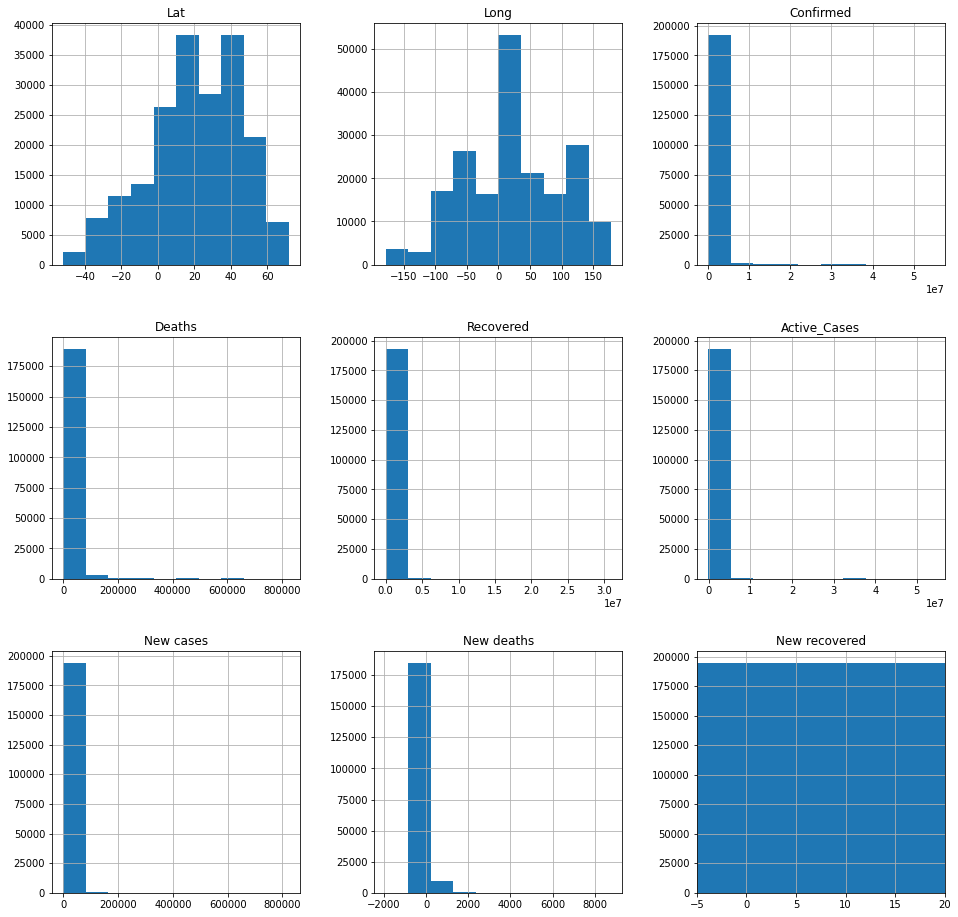

In [ ]:
pd.DataFrame.hist(covid_19, figsize=(16,16))
plt.xlim([-5, 20]) 
plt.show()

In [ ]:
# sns.pairplot(covid_19)

In [ ]:
covid_19.to_csv('COVID-19-time-series-clean-complete.csv')

### Basic Visualisation

In [ ]:
df_group=covid_19.groupby('Country/Region')["Confirmed"].max().reset_index()


In [ ]:
country_sort=df_group.sort_values(by="Confirmed",ascending=False)

In [ ]:
country_sort[:8]

Country/Region  Confirmed
180              US   54743982
78            India   34861579
23           Brazil   22291839
184  United Kingdom   12937886
142          Russia   10320405
61           France    9761814
179          Turkey    9484520
65          Germany    7193186

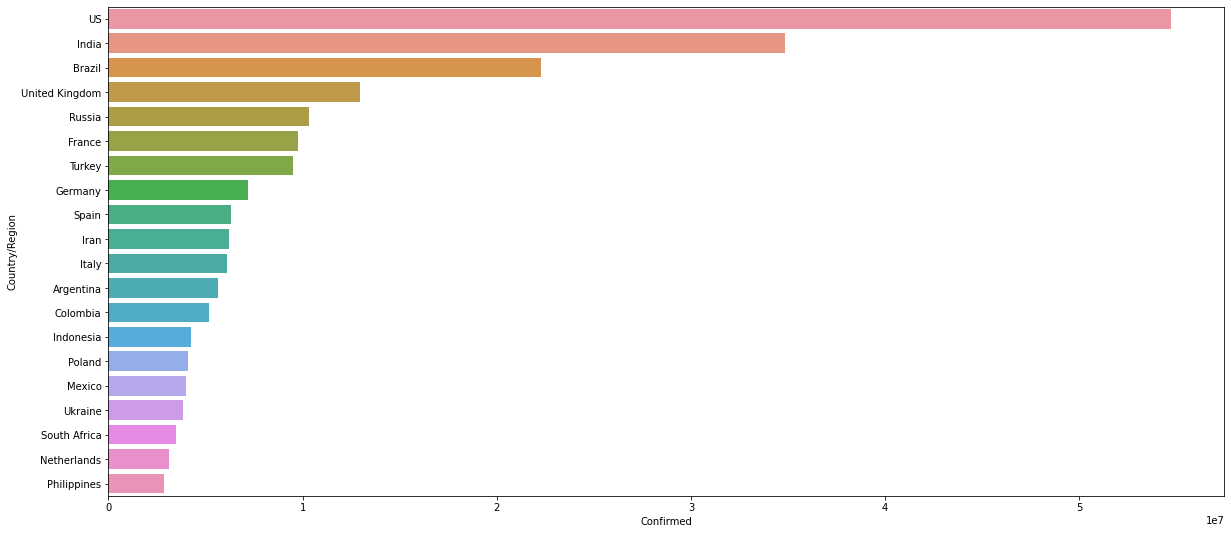

In [ ]:
plt.figure(figsize=(20,9))
sns.barplot(data=country_sort[:20],y="Country/Region",x="Confirmed",orient="h")

plt.show()

In [ ]:
fig=px.scatter(country_sort[:25],x="Country/Region",y="Confirmed",size="Confirmed",color="Country/Region",
               hover_name="Country/Region",size_max=60)
fig.update_layout(title="Top 20 Active Cases Per Country",
    xaxis_title="Country",
    yaxis_title="No of Confirmed Cases",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="#7f7f7f"))
                  
fig.show()

In [ ]:
covid_19.iloc[:,0:4]

Date      Country/Region        Lat        Long
0      2020-01-22         Afghanistan  33.939110   67.709953
1      2020-01-22             Albania  41.153300   20.168300
2      2020-01-22             Algeria  28.033900    1.659600
3      2020-01-22             Andorra  42.506300    1.521800
4      2020-01-22              Angola -11.202700   17.873900
...           ...                 ...        ...         ...
194535 2021-12-31             Vietnam  14.058324  108.277199
194536 2021-12-31  West Bank and Gaza  31.952200   35.233200
194537 2021-12-31               Yemen  15.552727   48.516388
194538 2021-12-31              Zambia -13.133897   27.849332
194539 2021-12-31            Zimbabwe -19.015438   29.154857

[194540 rows x 4 columns]

In [ ]:
# df_conf=covid_19.iloc[:,0:3]#.reset_index()

# df_death=covid_19.iloc[:,0:4]#.reset_index()
# # df_death=covid_19.iloc[:,[0:2,3]]
# # df_death=covid_19[["Country/Region","Deaths"]]
# df_death.drop(columns=["Confirmed"],inplace=True)
# df_conf["country"]=df_conf["Countfry/Region"]

# df_death["country"]=df_conf["Country/Region"]
# df_conf.drop(columns=["Country/Region"],inplace=True)
# df_death.drop(columns=["Country/Region"],inplace=True)

# df_conf=df_conf[["Date","country","Confirmed"]]
# df_death=df_death[["Date","country","Deaths"]]



# df_death.head()

In [ ]:
df_conf.head(4)

Date Country/Region       Lat
0 2020-01-22    Afghanistan  33.93911
1 2020-01-22        Albania  41.15330
2 2020-01-22        Algeria  28.03390
3 2020-01-22        Andorra  42.50630

In [ ]:
#Altair is an awesome visualisation lib
!pip install altair

In [ ]:
import altair as alt
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
ke = full_grouped[full_grouped['Country/Region'] == 'Kenya']

In [ ]:
base = alt.Chart(ke).mark_bar().encode(
    x='monthdate(Date):O',
).properties(
    width=600
)

In [ ]:
red=alt.value("#f54242")
base.encode(y='Confirmed').properties(title="Total Confirmed")|base.encode(y='Deaths',color=red).properties(title="Total Deaths")


alt.HConcatChart(...)

In [ ]:
red=alt.value("#f54242")
base.encode(y='New cases').properties(title="Daily New Cases")|base.encode(y='New deaths',color=red).properties(title="Daily New Deaths")


alt.HConcatChart(...)

In [ ]:
red=alt.value("#f54242")
base.encode(y='New recovered').properties(title="Daily New Recoveries")

alt.Chart(...)

In [ ]:
#Using Altair plot for East African Cases
full_grouped = pd.read_csv('COVID-19-time-series-clean-complete.csv', parse_dates=['Date'])
countries = ['Kenya', 'Ethiopia', 'Uganda', 'Tanzania','Rwanda', 'Burundi']#'South Africa']
selected_countries = full_grouped[full_grouped['Country/Region'].isin(countries)]

In [ ]:
full_grouped .head(5)

Unnamed: 0       Date Country/Region  ...  New cases  New deaths  New recovered
0           0 2020-01-22    Afghanistan  ...          0           0              0
1           1 2020-01-22        Albania  ...          0           0              0
2           2 2020-01-22        Algeria  ...          0           0              0
3           3 2020-01-22        Andorra  ...          0           0              0
4           4 2020-01-22         Angola  ...          0           0              0

[5 rows x 12 columns]

In [ ]:
alt.Chart(selected_countries).mark_circle().encode(
    x='monthdate(Date):O',
    y='Country/Region',
    color='Country/Region',
    size=alt.Size('New cases:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='Daily new cases')
    ) 
).properties(
    width=800,
    height=400,
    title='East Africa Daily New Cases'
)

alt.Chart(...)